<a href="https://colab.research.google.com/github/6404062636412/Intelligent/blob/main/%E0%B9%82%E0%B8%84%E0%B8%A3%E0%B8%87%E0%B8%82%E0%B9%88%E0%B8%B2%E0%B8%A2%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B8%AA%E0%B8%B2%E0%B8%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

โครงข่ายประสาท

In [ ]:
import os
import re
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')  # Download stopwords list
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
import pandas as pd
df = pd.read_csv('tweets.csv') #1 is real | 0 is false
df

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


In [ ]:
df = df.drop(['id', 'keyword', 'location'], axis=1)
df

,text,target
0,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,Telangana: Section 144 has been imposed in Bha...,1
2,Arsonist sets cars ablaze at dealership https:...,1
3,Arsonist sets cars ablaze at dealership https:...,1
4,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...
11365,Media should have warned us well in advance. T...,0
11366,i feel directly attacked 💀 i consider moonbin ...,0
11367,i feel directly attacked 💀 i consider moonbin ...,0
11368,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


In [ ]:
df.isnull().sum()

,0
text,0
target,0


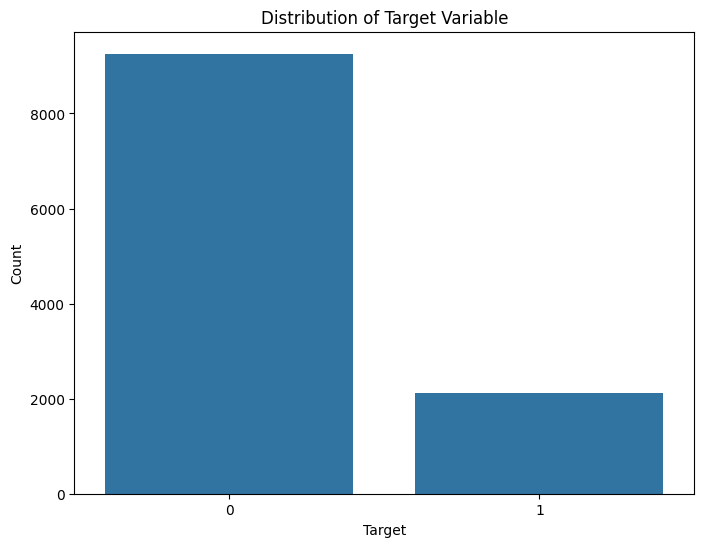

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()


In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    # 1. Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # 2. Remove special characters, punctuation, and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)

    # 3. Convert text to lowercase
    text = text.lower()

    # 4. Remove stopwords
    stop_words = set(stopwords.words('english'))
    pronouns_to_keep={'he', 'she', 'they','our', 'it', 'i' 'we', 'you', 'him', 'her', 'them', 'us', 'me'}

    # Remove pronouns from stop words
    stop_words -= pronouns_to_keep

    text_tokens = text.split()  # Tokenize text
    text_tokens = [word for word in text_tokens if word not in stop_words]

    # 5. Lemmatization (convert words to base form)
    text_tokens = [lemmatizer.lemmatize(word) for word in text_tokens]

    # Join tokens back into a single string
    cleaned_text = ' '.join(text_tokens)
    return cleaned_text

df['text_clean']=df['text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df

,text,target,text_clean
0,"Communal violence in Bhainsa, Telangana. ""Ston...",1,communal violence bhainsa telangana stone pelt...
1,Telangana: Section 144 has been imposed in Bha...,1,telangana section imposed bhainsa january clas...
2,Arsonist sets cars ablaze at dealership https:...,1,arsonist set car ablaze dealership
3,Arsonist sets cars ablaze at dealership https:...,1,arsonist set car ablaze dealership
4,"""Lord Jesus, your love brings freedom and pard...",0,lord jesus love brings freedom pardon fill me ...
...,...,...,...
11365,Media should have warned us well in advance. T...,0,medium warned u well advance wrecked whole nig...
11366,i feel directly attacked 💀 i consider moonbin ...,0,feel directly attacked consider moonbin amp ji...
11367,i feel directly attacked 💀 i consider moonbin ...,0,feel directly attacked consider moonbin amp ji...
11368,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0,ok remember outcast nd dora au au wrecked our ...


In [ ]:
X = df['text_clean']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Tokenization
tokenizer = Tokenizer(num_words=5000)  # Adjust num_words as needed
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding
max_sequence_length = 100  # Adjust max_sequence_length as needed
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

In [ ]:
X_test

,text_clean
3495,many illegal building demolished our city guad...
5461,who fatality tho
9794,onthisday chinese state medium confirmed irani...
11105,luck you miss windstorm either sidefly safe xxx
1803,inferno black friday death building much fuel ...
...,...
6723,love outlander dont miss fivestar timetravel a...
3215,marijuana illegal never caused death usage cig...
10822,genocide war crime continue southern cameroon ...
9718,show valuable decision you taken high time ended


In [ ]:
# Model Building
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_sequence_length))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Model Training
model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_split=0.2)  # Adjust epochs and batch_size

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 335ms/step - accuracy: 0.7949 - loss: 0.5031 - val_accuracy: 0.8876 - val_loss: 0.3173
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 331ms/step - accuracy: 0.9143 - loss: 0.2271 - val_accuracy: 0.8800 - val_loss: 0.3153
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 334ms/step - accuracy: 0.9483 - loss: 0.1473 - val_accuracy: 0.8756 - val_loss: 0.3745
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 325ms/step - accuracy: 0.9659 - loss: 0.0984 - val_accuracy: 0.8693 - val_loss: 0.3969
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 318ms/step - accuracy: 0.9790 - loss: 0.0760 - val_accuracy: 0.8712 - val_loss: 0.4775


In [ ]:
# Model Evaluation Classification report
y_pred = (model.predict(X_test_pad) > 0.5)
print(classification_report(y_test, y_pred))

107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2808
           1       0.66      0.60      0.63       603

    accuracy                           0.88      3411
   macro avg       0.79      0.77      0.78      3411
weighted avg       0.87      0.88      0.87      3411



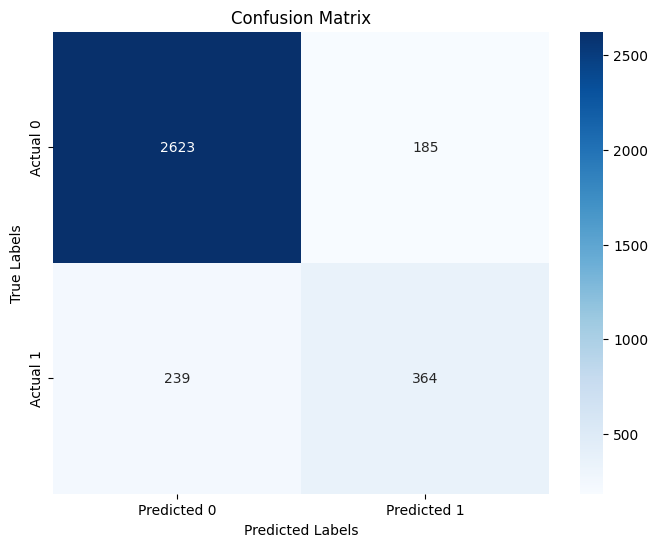

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step


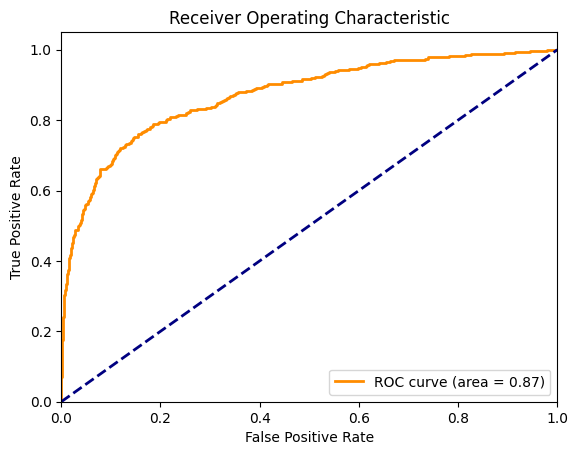

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_pred_prob = model.predict(X_test_pad)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
model.save('Disaster_model.h5')

In [ ]:
# prompt: dowload tokenizer .pkl

import pickle

# Assuming 'tokenizer' is the tokenizer object from your code
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
